<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/commercial_bank_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Libraries**

In [1]:
!pip install fredapi

### **Import Libraries**

In [2]:
import os
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **FRED API**

In [3]:
fred = Fred(api_key=userdata.get('FRED'))

### **Get Data**

In [15]:
ci_loans = fred.get_series('BUSLOANS', start='1947-01-01').to_frame('BUSLOANS')
re_loans = fred.get_series('REALLN', start='1947-01-01').to_frame('REALLN')
total_loans = fred.get_series('LOANS', start='1947-01-01').to_frame('LOANS')
df = pd.concat([ci_loans, re_loans, total_loans], axis=1)
df['REL_BUSLOANS'] = df['BUSLOANS']/df['LOANS']*100
df['REL_REALLN'] = df['REALLN']/df['LOANS']*100
df.head()

BUSLOANS  REALLN    LOANS  REL_BUSLOANS  REL_REALLN
1947-01-01   11.2894  6.7960  26.7375     42.223095   25.417485
1947-02-01   11.5179  6.9551  27.2570     42.256668   25.516748
1947-03-01   11.7667  7.1249  27.8054     42.318039   25.624159
1947-04-01   12.0269  7.2966  28.3714     42.390929   25.718153
1947-05-01   12.2788  7.4699  28.9322     42.439911   25.818638

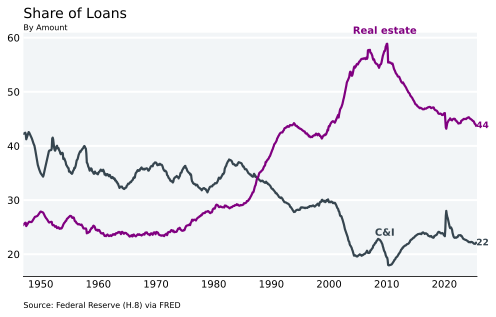

In [31]:

fig, ax = plt.subplots(dpi=300, figsize=(7, 4.5))
fig.set_tight_layout(True)

ax.set_facecolor((.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)
ax.yaxis.set_tick_params(length=0)

for key in ("left", "right", "top"):
    ax.spines[key].set_visible(False)

# Titles
ax.text(0., 1.06, s="Share of Loans", transform=ax.transAxes, size=14)
ax.text(0., 1.01, s="By Amount", transform=ax.transAxes, size=8)

# Plot lines
ci_color = "#36454F"   # dark grey
re_color = "purple"    # light purple-ish
l1, = ax.plot(df.index, df["REL_BUSLOANS"], color=ci_color, lw=2.2, label="C&I loans share")
l2, = ax.plot(df.index, df["REL_REALLN"], color=re_color, lw=2.2, label="Real estate loans share")

# Grid & layering
ax.yaxis.grid(True, color="white", linewidth=2)
ax.set_axisbelow(True)

# Nice monthly ticks (adjust as you like)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

# Add a bit of room on the right for end labels
right_pad_days = 60
ax.set_xlim(df.index.min(), df.index.max() + pd.Timedelta(days=right_pad_days))

def _format_val(v):
    # If values look like shares (<= 1.5), show as percent; else as a number
    return f"{v:.0%}" if pd.notna(v) and v <= 1.5 else f"{v:.0f}"

# Label helpers for each series
labels = {
    "REL_BUSLOANS": ("C&I", ci_color),
    "REL_REALLN":   ("Real estate", re_color),
}

for col, (name, color) in labels.items():
    s = df[col].dropna()
    if s.empty:
        continue

    # 1) Final value tag at right
    x_end = s.index[-1]
    y_end = s.iloc[-1]
    ax.text(
        x_end + pd.Timedelta(days=15), y_end,
        _format_val(y_end),
        color=color, fontweight="bold", va="center", ha="left", fontsize=9
    )

    # 2) Bold series label near the midpoint
    mid_idx = (len(s) // 5) *4
    x_mid = s.index[mid_idx]
    y_mid = s.iloc[mid_idx] + 3
    ax.text(
        x_mid, y_mid + (0.02 * (s.max() - s.min()) if s.max() > s.min() else 0.0),
        name, color=color, fontweight="bold", va="center", ha="center", fontsize=10
    )

# Source line
ax.annotate(
    "Source: Federal Reserve (H.8) via FRED",
    xy=(0., -0.12), xycoords="axes fraction",
    ha="left", va="center", fontsize=8
)
fig.savefig('./commercial_bank_loans.png')
plt.show()

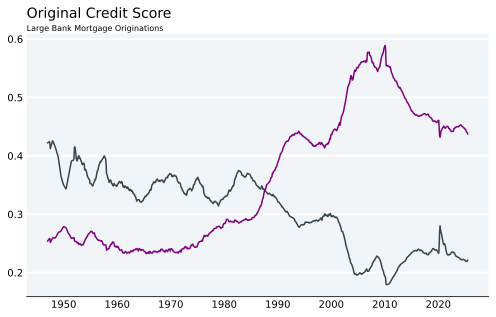

In [13]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.06, s='Original Credit Score', transform=ax.transAxes, size=14)
ax.text(0., 1.01, s='Large Bank Mortgage Originations', transform=ax.transAxes, size=8)
plt.plot(df.index, df['REL_BUSLOANS'], color='#36454F')
plt.plot(df.index, df['REL_REALLN'], color='purple')
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)

# ax.set_xlim(df.index.min(), df.index.max() + pd.Timedelta(days=60))

# labels = {
#     'Rate10': ('10th',  '#36454F'),
#     'Rate25': ('25th',  'purple'),
#     'Rate50': ('50th',  'navy'),
# }

# for col, (pct_text, color) in labels.items():
#     s = df[col].dropna()

#     # 1. Final value label at the right end
#     x_end = s.index[-1]
#     y_end = s.iloc[-1]
#     ax.text(x_end + pd.Timedelta(days=15), y_end,
#             f"{y_end:.0f}", color=color, fontweight='bold',
#             va='center', ha='left')

#     # 2. Percentile label in the middle of the line
#     mid_idx = len(s) // 2
#     x_mid = s.index[mid_idx]
#     y_mid = s.iloc[mid_idx]+ 10
#     ax.text(x_mid, y_mid, pct_text, color=color, fontweight='bold',
#             va='center', ha='center', fontsize=10)

# ax.annotate("Source: Federal Reserve Bank of Philadelphia via FRED",
#         xy = (0., -0.1),
#         xycoords='axes fraction',
#         ha='left',
#         va="center",
#         fontsize=8)
# fig.savefig('./original_credit_score.png')
plt.show()